In [17]:
import os
import re
import json
import matplotlib.pyplot as plt
root = './sol'
list_pass= [] 
list_CE= []
list_EE= []
list_TLE= []
list_MLE= []
score = {}
errors = {}

# Load lists and dictionaries from JSON files
with open('./results/list_pass.json', 'r', encoding='utf-8') as f:
    list_pass = json.load(f)

with open('./results/list_CE.json', 'r', encoding='utf-8') as f:
    list_CE = json.load(f)

with open('./results/list_EE.json', 'r', encoding='utf-8') as f:
    list_EE = json.load(f)

with open('./results/list_TLE.json', 'r', encoding='utf-8') as f:
    list_TLE = json.load(f)

with open('./results/list_MLE.json', 'r', encoding='utf-8') as f:
    list_MLE = json.load(f)

with open('./results/score.json', 'r', encoding='utf-8') as f:
    score = json.load(f)

with open('./results/errors.json', 'r', encoding='utf-8') as f:
    errors = json.load(f)

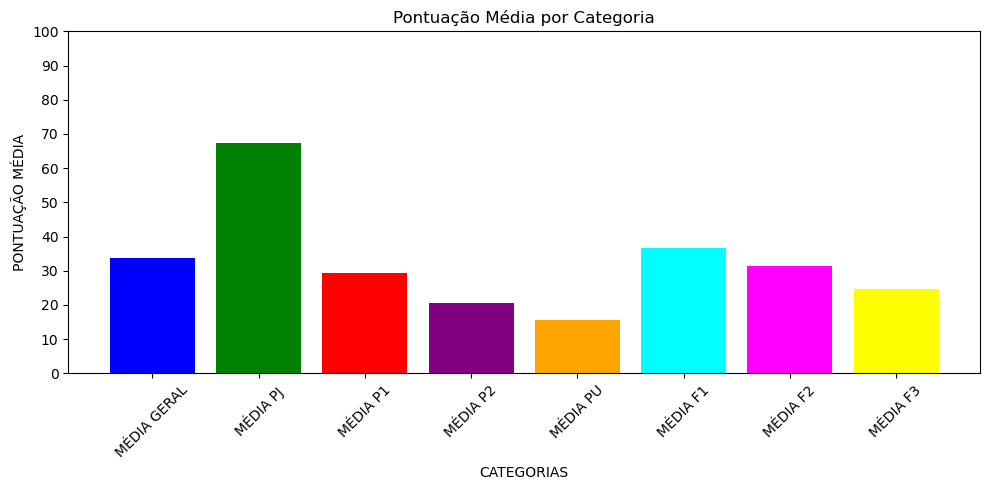

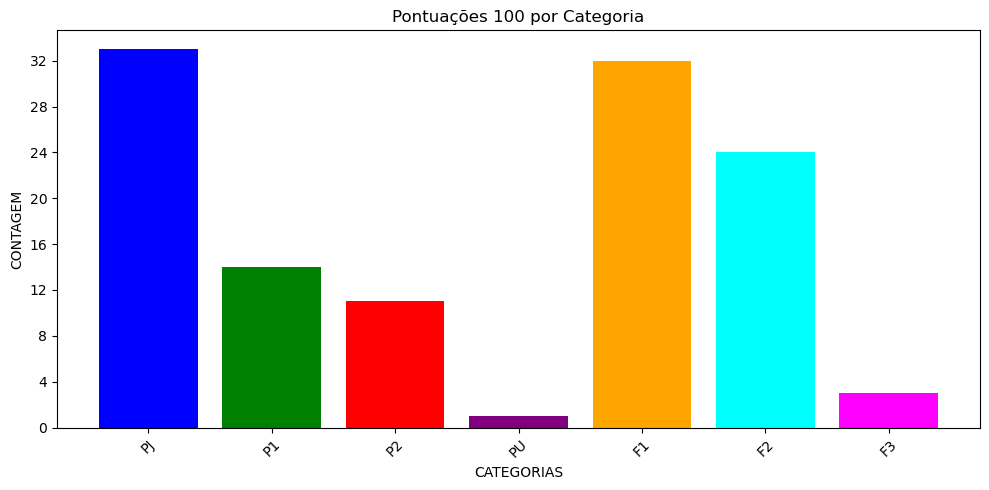

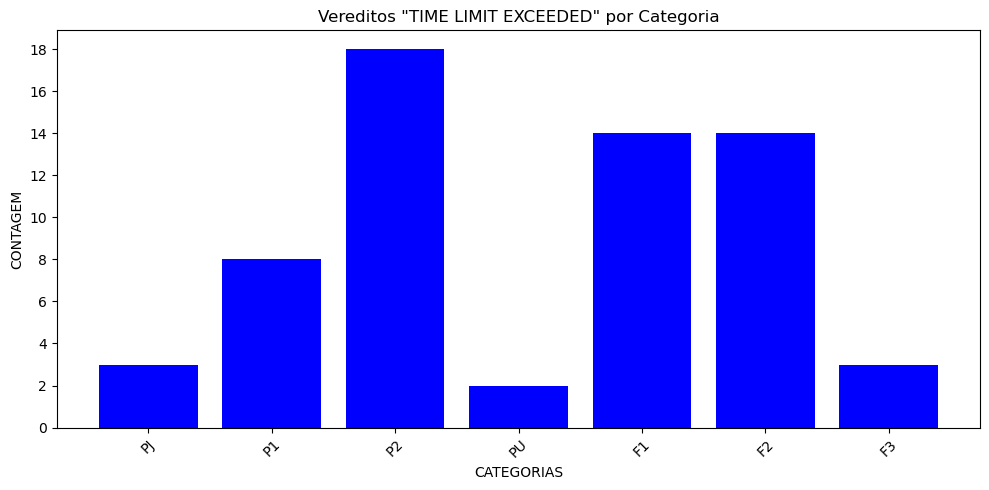

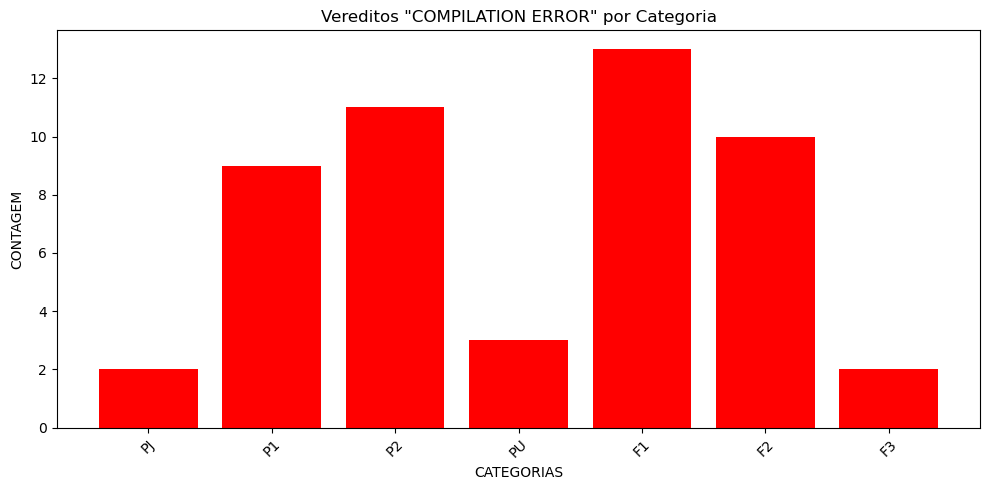

In [ ]:
from matplotlib.ticker import MaxNLocator

def calculate_average(scores):
    return sum(scores) / len(scores)

all_scores = list(score.values())
average_all = calculate_average(all_scores)

categories = ['pj', 'p1', 'p2', 'pu', 'f1', 'f2', 'f3']
category_averages = {}

for category in categories:
    category_scores = [score[key] for key in score if category in key]
    category_averages[category] = calculate_average(category_scores)

# Plotar os resultados
labels = ['MÉDIA GERAL'] + [f'MÉDIA {cat.upper()}' for cat in categories]
averages = [average_all] + [category_averages[cat] for cat in categories]

plt.figure(figsize=(10, 5))
plt.bar(labels, averages, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow'])
plt.xlabel('CATEGORIAS')
plt.ylabel('PONTUAÇÃO MÉDIA')
plt.title('Pontuação Média por Categoria')
plt.ylim(0, 100)  # Assumindo que as pontuações são de 0 a 100
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure integer y-axis labels
plt.tight_layout()
plt.show()

category_100_counts = {category: 0 for category in categories}

for key, value in score.items():
    if value == 100:
        category_100_counts[key[5:7]] += 1
        category_100_counts[key[8:10]] += 1

# Plotar a distribuição de pontuações que são exatamente 100
labels_100 = [f'{cat.upper()}' for cat in categories]
counts_100 = [category_100_counts[cat] for cat in categories]

plt.figure(figsize=(10, 5))
plt.bar(labels_100, counts_100, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.xlabel('CATEGORIAS')
plt.ylabel('CONTAGEM')
plt.title('Pontuações 100 por Categoria')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure integer y-axis labels
plt.tight_layout()
plt.show()

tle_category_counts = {category: 0 for category in categories}
ce_category_counts = {category: 0 for category in categories}

# Função para incrementar contadores de categoria
def increment_category_counts(key, category_counts):
    category_counts[key[5:7]] += 1
    category_counts[key[8:10]] += 1

# Iterar através de list_TLE e incrementar contadores
for key in list_TLE:
    increment_category_counts(key, tle_category_counts)

# Iterar através de list_CE e incrementar contadores
for key in list_CE:
    increment_category_counts(key, ce_category_counts)

# Plotar a distribuição de categorias em list_TLE
plt.figure(figsize=(10, 5))
plt.bar([k.upper() for k in tle_category_counts.keys()], tle_category_counts.values(), color='blue')
plt.xlabel('CATEGORIAS')
plt.ylabel('CONTAGEM')
plt.title('Vereditos "TIME LIMIT EXCEEDED" por Categoria')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure integer y-axis labels
plt.tight_layout()
plt.show()

# Plotar a distribuição de categorias em list_CE
plt.figure(figsize=(10, 5))
plt.bar([k.upper() for k in ce_category_counts.keys()], ce_category_counts.values(), color='red')
plt.xlabel('CATEGORIAS')
plt.ylabel('CONTAGEM')
plt.title('Vereditos "COMPILATION ERROR" por Categoria')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure integer y-axis labels
plt.tight_layout()
plt.show()

In [13]:
error_groups = ['was not declared', 'is not a member', 'does not name a type', 'no matching function']
error_count = {group: 0 for group in error_groups}
for error in errors.values():
    search = re.search('error[^\n]*', error)
    if search:
        error_message = search.group()
        for group in error_groups:
            if group in error_message:
                error_count[group] += 1

for group, count in error_count.items():
    print(f'"{group}": {count}')

"was not declared": 18
"is not a member": 2
"does not name a type": 1
"no matching function": 1
